<h2>María Sofía Álvarez López</h2>

In [1]:
# ESAI
import numpy as np
from sympy import *
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
pd.set_option("display.precision", 16)

In [2]:
%matplotlib inline

<h1 align='center'>Laboratorio 7 - Programación científica</h1>

## Punto 7

Primero, defino las funciones que usaré para el punto 7:

In [3]:
# Por biseccion
''' Funcion que obtiene la raiz de una ecuacion no lineal de una variable usando el metodo de la biseccion.
params: 
f: funcion no lineal a la cual se busca encontrar su raiz.
intervalo: arreglo de numpy con el intervalo inicial en el cual se evaluara la funcion.
tol_x: tolerancia en x. 
tol_y: tolerancia en y. Por defecto, tol_x = tol_y = 10**-5.
n_max: numero maximo de iteraciones que le permito al algoritmo. Por defecto, n_max=1000.
retorna: 
num_iter: numero de iteraciones
x2: raiz final calculada
xr_iter: valor estimado de la raiz en cada iteracion
'''
def biseccion(f, intervalo, tol_x=10**-5, tol_y=10**-5, n_max=1000):
    num_iter = 0 # Inicializo una variable con el numero de iteraciones
    xr_iter = np.array([]) #Defino un arreglo para ir guardando los valores de las raices candidatas, obtenidas en cada iteracion
    x0, x1 = intervalo[0], intervalo[-1] #Obtengo los puntos inicial y final del intervalo que busco evaluar 
    x2_prev = x1 # Creo una variable inicial para la raiz en la iteracion anterior
    while 1: # Inicio un proceso iterativo
        num_iter += 1 # Se agrega una iteracion al numero total de iteraciones
        x2 = (x0+x1)/2 # Obtengo la raiz candidata
        xr_iter = np.append(xr_iter, x2) # Adiciono la raiz hallada al arreglo de raices obtenidas en cada iteracion
        # Se evaluan los criterios de parada:
        if np.abs(x2-x2_prev)<=tol_x: # Si la resta de las raiz anterior con la actual es menor que la tolerancia, termino el proceso
            return num_iter, x2, xr_iter
        if np.abs(f(x2))<=tol_y: # Si la funcion evaluada en la raiz actual es tan cercana a cero como la tolerancia lo pide, termino el proceso.
            return num_iter, x2, xr_iter
        # Reviso si las iteraciones que llevo estan por debajo del limite establecido.
        if num_iter >= n_max:
            print('Maximo numero de iteraciones')
            return num_iter, x2, xr_iter
        # Se actualiza el intervalo de acuerdo con la condicion
        if f(x0)*f(x2) <= 0: # La raiz se encuentra en el intervalo [x0, x2].
            x1 = x2
        else: # La raiz se encuentra en el intervalo [x2, x1].
            x0 = x2 
        # Se actualiza x2 antiguo con el actual para la siguiente iteracion
        x2_prev = x2

''' Funcion que obtiene la raiz de una ecuacion no lineal de una variable usando el metodo de la falsa posicion.
params: 
f: funcion no lineal a la cual se busca encontrar su raiz.
intervalo: arreglo de numpy con el intervalo inicial en el cual se evaluara la funcion.
tol_x: tolerancia en x. 
tol_y: tolerancia en y. Por defecto, tol_x = tol_y = 10**-5.
n_max: numero maximo de iteraciones que le permito al algoritmo. Por defecto, n_max=1000.
retorna: 
num_iter: numero de iteraciones
x2: raiz final calculada
xr_iter: valor estimado de la raiz en cada iteracion
'''
def falsa_posicion(f, intervalo, tol_x=10**-5, tol_y=10**-5, n_max=1000):
    num_iter = 0 # Inicializo una variable con el numero de iteraciones
    xr_iter = np.array([]) #Defino un arreglo para ir guardando los valores de las raíces candidatas, obtenidas en cada iteracion
    x0, x1 = intervalo[0], intervalo[-1] #Obtengo los puntos inicial y final del intervalo que busco evaluar 
    x2_prev = x1 # Creo una variable inicial para la raíz en la iteración anterior
    while 1: # Inicio un proceso iterativo
        num_iter += 1 # Se agrega una iteracion al numero total de iteraciones
        x2 = x1 - ((f(x1)*(x1-x0))/(f(x1)-f(x0))) # Se obtiene la raiz candidata
        xr_iter = np.append(xr_iter, x2) # Aniado la raiz al arreglo
        # Se evaluan los criterios de parada:
        if np.abs(x2-x2_prev)<=tol_x: # Si la resta de las raiz anterior con la actual es menor que la tolerancia, termino el proceso
            return num_iter, x2, xr_iter
        if np.abs(f(x2))<=tol_y: # Si la funcion evaluada en la raiz actual es tan cercana a cero como la tolerancia lo pide, termino el proceso.
            return num_iter, x2, xr_iter
        # Reviso si las iteraciones que llevo estan por debajo del limite establecido.
        if num_iter >= n_max:
            print('Maximo numero de iteraciones')
            return num_iter, x2, xr_iter
        # Se actualiza el intervalo de acuerdo con la condicion
        if f(x0)*f(x2) <= 0: # La raiz se encuentra en el intervalo [x0, x2].
            x1 = x2
        else: # La raiz se encuentra en el intervalo [x2, x1].
            x0 = x2 
        # Se actualiza x2 antiguo con el actual para la siguiente iteracion
        x2_prev = x2

'''
Funcion que calcula la derivada de una funcion f.
params:
f: funcion a calcular su derivada
retorna:
num_iter: numero de iteraciones
x2: raiz final calculada
xr_iter: valor estimado de la raiz en cada iteracion'''
def derivative(f):
    x = Symbol('x')
    y_prima = f.diff(Symbol('x'))
    return lambdify(x, y_prima, 'numpy')

# Ahora si defino el metodo de Newton
''' Funcion que obtiene la raiz de una ecuacion no lineal de una variable usando el metodo de Newton.
params: 
f: funcion no lineal a la cual se busca encontrar su raiz.
f_sympy: Representacion de la funcion f usando sympy.
x1: punto inicial.
tol_x: tolerancia en x. 
tol_y: tolerancia en y. Por defecto, tol_x = tol_y = 10**-5.
n_max: numero maximo de iteraciones que le permito al algoritmo. Por defecto, n_max=1000.
retorna: 
num_iter: numero de iteraciones
x2: raiz final calculada
xr_iter: valor estimado de la raiz en cada iteracion
'''
def newton(f, f_sympy, x1, tol_x=10**-5, tol_y=10**-5, n_max=1000):
    num_iter = 0 # Inicializo una variable con el numero de iteraciones
    xr_iter = np.array([]) #Defino un arreglo para ir guardando los valores de las raices candidatas, obtenidas en cada iteracion
    x2_prev = x1 # Creo una variable inicial para la raiz en la iteracion anterior
    while 1: # Inicio un proceso iterativo
        num_iter += 1 # Se agrega una iteracion al numero total de iteraciones
        df = derivative(f_sympy)
        x2 = x1 - (f(x1)/df(x1)) # Se obtiene la raiz candidata
        xr_iter = np.append(xr_iter, x2) # Aniadimos la raiz al arreglo
        # Se evaluan los criterios de parada:
        if np.abs(x2-x2_prev)<=tol_x: # Si la resta de las raiz anterior con la actual es menor que la tolerancia, termino el proceso
            return num_iter, x2, xr_iter
        if np.abs(f(x2))<=tol_y: # Si la funcion evaluada en la raiz actual es tan cercana a cero como la tolerancia lo pide, termino el proceso.
            return num_iter, x2, xr_iter
        # Reviso si las iteraciones que llevo estan por debajo del limite establecido.
        if num_iter >= n_max:
            print('Maximo numero de iteraciones')
            return num_iter, x2, xr_iter
        # Se actualiza el intervalo de acuerdo con la condicion
        x1 = x2
        # Se actualiza x2 antiguo con el actual para la siguiente iteracion
        x2_prev = x2

''' Funcion que obtiene la raiz de una ecuacion no lineal de una variable usando el metodo de la secante.
params: 
f: funcion no lineal a la cual se busca encontrar su raiz.
x0, x1: puntos iniciales sobre los cuales inicia el metodo.
tol_x: tolerancia en x. 
tol_y: tolerancia en y. Por defecto, tol_x = tol_y = 10**-5.
n_max: numero maximo de iteraciones que le permito al algoritmo. Por defecto, n_max=1000.
retorna: 
num_iter: numero de iteraciones
x2: raiz final calculada
xr_iter: valor estimado de la raiz en cada iteracion
'''
def secante(f, x0, x1,tol_x=10**-5, tol_y=10**-5, n_max=1000):
    num_iter = 0 # Inicializo una variable con el numero de iteraciones
    xr_iter = np.array([]) #Defino un arreglo para ir guardando los valores de las raices candidatas, obtenidas en cada iteracion
    x2_prev = x1 # Creo una variable inicial para la raiz en la iteración anterior
    while 1: # Inicio un proceso iterativo
        num_iter += 1 # Se agrega una iteracion al numero total de iteraciones
        x2 = x1 - ((f(x1)*(x1-x0))/(f(x1)-f(x0))) # Se obtiene la raiz candidata
        xr_iter = np.append(xr_iter, x2) # Aniado la raiz al arreglo
        # Se evaluan los criterios de parada:
        if np.abs(x2-x2_prev)<=tol_x: # Si la resta de las raiz anterior con la actual es menor que la tolerancia, termino el proceso
            return num_iter, x2, xr_iter
        if np.abs(f(x2))<=tol_y: # Si la funcion evaluada en la raiz actual es tan cercana a cero como la tolerancia lo pide, termino el proceso.
            return num_iter, x2, xr_iter
        # Reviso si las iteraciones que llevo estan por debajo del limite establecido.
        if num_iter >= n_max:
            print('Maximo numero de iteraciones')
            return num_iter, x2, xr_iter
        # Se actualiza el intervalo de acuerdo con la condicion
        x0, x1 = x1, x2
        # Se actualiza x2 antiguo con el actual para la siguiente iteracion
        x2_prev = x2

Defino las funciones que usaré en el punto 7:

### Función 1:
$$e^{-10x^3} - \sqrt{x} + \cos{10x} = - 1 \longrightarrow f(x) = e^{-10x^3} - \sqrt{x} + \cos{10x} + 1. $$
Primero, defino la función:

In [4]:
def f1(x):
    return np.exp(-10*(x)**3)-np.sqrt(x)+np.cos(10*x)+1

Ahora, la grafico en el rango dado:

In [5]:
x = np.arange(0.7,0.9,0.0001)

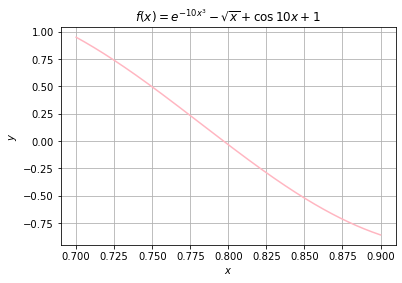

In [6]:
plt.plot(x, f1(x),c='lightpink')
plt.grid(1)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x) = e^{-10x^3} - \sqrt{x} + \cos{10x} + 1$')
plt.show()

La función tiene una raíz en el intervalo deseado. Ahora, uso las funciones que definí en el archivo de Python para calcular la raíz. Las que pongo aquí son exactamente las mismas que definí en el archivo. Como la tolerancia ya está definida en $10^{-5}$ por defecto, no llamo a este parámetro.

In [7]:
# 1. Biseccion
num_iter_biseccion_f1, x2_biseccion_f1, xr_iter_biseccion_f1 = biseccion(f1, intervalo=x)
# 2. Falsa posicion
num_iter_falsa_posicion_f1, x2_falsa_posicion_f1, xr_iter_falsa_posicion_f1 = falsa_posicion(f1, intervalo=x)
# 3. Newton
# 3.1. Defino la funcion f1 usando sympy
f1_sympy = exp(-10*(Symbol('x')**3)) - sqrt(Symbol('x')) + cos(10*Symbol('x')) + 1
# 3.2. Llamo al metodo
num_iter_newton_f1, x2_newton_f1, xr_iter_newton_f1 = newton(f1, f1_sympy, x1=0.9)
# 4. Secante
num_iter_secante_f1, x2_secante_f1, xr_iter_secante_f1 = secante(f1, x0=0.85, x1=0.9)

### Función 2:
$$ \sin{(4x)} + x^{3/2} + x^2 = 4 - \frac{2}{3}x \longrightarrow f(x) = \sin{(4x)} + x^{3/2} + x^2 - 4 + \frac{2}{3}x. $$
Primero, defino la función:

In [8]:
def f2(x):
    return np.sin(4*x) + x**(3/2) + x**2 + (2/3)*x - 4

Ahora, la grafico en el rango dado:

In [9]:
x = np.arange(1, 4, 0.0001)

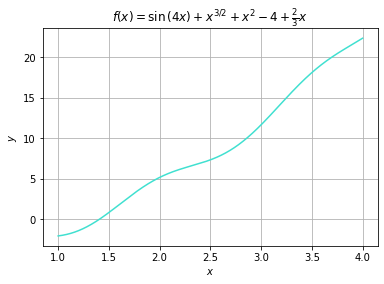

In [10]:
plt.plot(x, f2(x),c='turquoise')
plt.grid(1)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x) =\sin{(4x)} + x^{3/2} + x^2 - 4 + \frac{2}{3}x$')
plt.show()

La función tiene una raíz en el intervalo deseado. Ahora, uso las funciones que definí en el archivo de Python para calcular la raíz. Las que pongo aquí son exactamente las mismas que definí en el archivo. Como la tolerancia ya está definida en $10^{-5}$ por defecto, no llamo a este parámetro.

In [11]:
# 1. Biseccion
num_iter_biseccion_f2, x2_biseccion_f2, xr_iter_biseccion_f2 = biseccion(f2, intervalo=x)
# 2. Falsa posicion
num_iter_falsa_posicion_f2, x2_falsa_posicion_f2, xr_iter_falsa_posicion_f2 = falsa_posicion(f2, intervalo=x)
# 3. Newton
# 3.1. Defino la funcion f2 usando sympy
f2_sympy = sin(4*Symbol('x')) + Symbol('x')**(3/2) + Symbol('x')**2 + (2/3)* Symbol('x') - 4
# 3.2. Llamo al metodo
num_iter_newton_f2, x2_newton_f2, xr_iter_newton_f2 = newton(f2, f2_sympy, x1=3.5)
# 4. Secante
num_iter_secante_f2, x2_secante_f2, xr_iter_secante_f2 = secante(f2, x0=3.45, x1=3.5)

### Función 3:
$$ 6.67h = -3.65\ln{\left(\frac{x}{5.33}\right)} + \sqrt{2}e^{-c^2 -4.25} + 10.54\cos{(x-2.2)}, \;\; h=c=\pi/2  \longrightarrow$$

$$ f(x) = -3.65\ln{\left(\frac{x}{5.33}\right)} + \sqrt{2}e^{-c^2 -4.25} + 10.54\cos{(x-2.2)} - 6.67h, \;\; h=c=\pi/2. $$

Primero, defino la función:

In [12]:
def f3(x, c=np.pi/2, h=np.pi/2):
    return -3.65*np.log(x/5.33) + np.sqrt(2)*np.exp(-(c**2)-4.25) + 10.54*np.cos(x-2.2) - 6.67*h

Ahora, la grafico en el rango dado:

In [13]:
x = np.arange(2, 4, 0.0001)

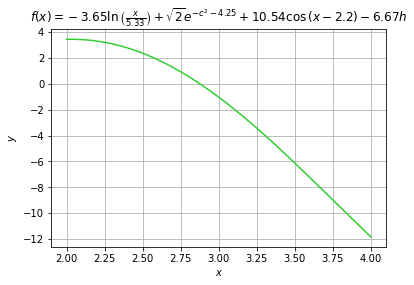

In [14]:
plt.plot(x, f3(x),c='limegreen')
plt.grid(1)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$f(x) =-3.65\ln{\left(\frac{x}{5.33}\right)} + \sqrt{2}e^{-c^2 -4.25} + 10.54\cos{(x-2.2)} - 6.67h$')
plt.show()

La función tiene una raíz en el intervalo deseado. Ahora, uso las funciones que definí en el archivo de Python para calcular la raíz. Las que pongo aquí son exactamente las mismas que definí en el archivo. Como la tolerancia ya está definida en $10^{-5}$ por defecto, no llamo a este parámetro.

In [15]:
# 1. Biseccion
num_iter_biseccion_f3, x2_biseccion_f3, xr_iter_biseccion_f3 = biseccion(f3, intervalo=x)
# 2. Falsa posicion
num_iter_falsa_posicion_f3, x2_falsa_posicion_f3, xr_iter_falsa_posicion_f3 = falsa_posicion(f3, intervalo=x)
# 3. Newton
# 3.1. Defino la funcion f3 usando sympy
c = h = np.pi/2
f3_sympy = -3.65*ln(Symbol('x')/5.33) + sqrt(2)*exp(-(c**2)-4.25) + 10.54*cos(Symbol('x')-2.2) -6.6*h
# 3.2. Llamo al metodo
num_iter_newton_f3, x2_newton_f3, xr_iter_newton_f3 = newton(f3, f3_sympy, x1=4)
# 4. Secante
num_iter_secante_f3, x2_secante_f3, xr_iter_secante_f3 = secante(f3, x0=3.95, x1=4)

Con esto, completo la tabla. Para la función 1:

In [16]:
data_f1 =  {'Función': ['Función 1']*4,
            'Método': ['Bisección', 'Falsa Posición', 'Newton', 'Secante'], 
            'Intervalo o punto inicial': ["[0.7, 0.9]", "[0.7, 0.9]", "0.9", "0.85, 0.9"],
            'Número total de iteraciones': [num_iter_biseccion_f1, num_iter_falsa_posicion_f1, num_iter_newton_f1, num_iter_secante_f1],
            r'Raíz $x_r$': [x2_biseccion_f1, x2_falsa_posicion_f1, x2_newton_f1, x2_secante_f1],
            r'$f(x_r)$': [f1(x2_biseccion_f1), f1(x2_falsa_posicion_f1), f1(x2_newton_f1), f1(x2_secante_f1)]}
df1 = pd.DataFrame(data_f1)
df1.set_index(['Función', 'Método'], inplace=True)
df1

Intervalo o punto inicial  \
Función   Método                                     
Función 1 Bisección                     [0.7, 0.9]   
          Falsa Posición                [0.7, 0.9]   
          Newton                               0.9   
          Secante                        0.85, 0.9   

                          Número total de iteraciones          Raíz $x_r$  \
Función   Método                                                            
Función 1 Bisección                                15  0.7967956542968643   
          Falsa Posición                            4  0.7967948315576083   
          Newton                                    4  0.7967948029113932   
          Secante                                   4  0.7967946551724332   

                                    $f(x_r)$  
Función   Método                              
Función 1 Bisección      -0.0000087480834761  
          Falsa Posición -0.0000000136534783  
          Newton          0.0000002904629196  
          Secante         0.0000018589020722

Con esto, completo la tabla. Para la función 2:

In [17]:
data_f2 =  {'Función': ['Función 2']*4,
            'Método': ['Bisección', 'Falsa Posición', 'Newton', 'Secante'], 
            'Intervalo o punto inicial': ["[1.0, 4.0]", "[1.0, 4.0]", "3.5", "3.45, 3.5"],
            'Número total de iteraciones': [num_iter_biseccion_f2, num_iter_falsa_posicion_f2, num_iter_newton_f2, num_iter_secante_f2],
            r'Raíz $x_r$': [x2_biseccion_f2, x2_falsa_posicion_f2, x2_newton_f2, x2_secante_f2],
            r'$f(x_r)$': [f2(x2_biseccion_f2), f2(x2_falsa_posicion_f2), f2(x2_newton_f2), f2(x2_secante_f2)]}

df2 = pd.DataFrame(data_f2)
df2.set_index(['Función', 'Método'], inplace=True)
df2

Intervalo o punto inicial  \
Función   Método                                     
Función 2 Bisección                     [1.0, 4.0]   
          Falsa Posición                [1.0, 4.0]   
          Newton                               3.5   
          Secante                        3.45, 3.5   

                          Número total de iteraciones          Raíz $x_r$  \
Función   Método                                                            
Función 2 Bisección                                19  1.4096905515670328   
          Falsa Posición                            5  1.4096884628486834   
          Newton                                    5  1.4096887909626317   
          Secante                                   5  1.4096886522562191   

                                    $f(x_r)$  
Función   Método                              
Función 2 Bisección       0.0000149036847388  
          Falsa Posición -0.0000027768496631  
          Newton          0.0000000005581029  
          Secante        -0.0000011735593715

Con esto, completo la tabla. Para la función 3:

In [18]:
data_f3 =  {'Función': ['Función 3']*4,
            'Método': ['Bisección', 'Falsa Posición', 'Newton', 'Secante'], 
            'Intervalo o punto inicial': ["[2.0, 4.0]", "[2.0, 4.0]", "4.0", "3.95, 4.0"],
            'Número total de iteraciones': [num_iter_biseccion_f3, num_iter_falsa_posicion_f3, num_iter_newton_f3, num_iter_secante_f3],
            r'Raíz $x_r$': [x2_biseccion_f3, x2_falsa_posicion_f3, x2_newton_f3, x2_secante_f3],
            r'$f(x_r)$': [f3(x2_biseccion_f3), f3(x2_falsa_posicion_f3), f3(x2_newton_f3), f3(x2_secante_f3)]}

df3 = pd.DataFrame(data_f3)
df3.set_index(['Función', 'Método'], inplace=True)
df3

Intervalo o punto inicial  \
Función   Método                                     
Función 3 Bisección                     [2.0, 4.0]   
          Falsa Posición                [2.0, 4.0]   
          Newton                               4.0   
          Secante                        3.95, 4.0   

                          Número total de iteraciones          Raíz $x_r$  \
Función   Método                                                            
Función 3 Bisección                                18  2.8758030704516777   
          Falsa Posición                           10  2.8757975029828353   
          Newton                                    4  2.8758003801572869   
          Secante                                   5  2.8758003815241771   

                                    $f(x_r)$  
Función   Método                              
Función 3 Bisección      -0.0000211517116107  
          Falsa Posición  0.0000226209132261  
          Newton         -0.0000000000144773  
          Secante        -0.0000000107612603

La tabla consolidada con los 4 métodos para las 3 funciones se encuentra a continuación:

In [19]:
tabla = result = pd.concat([df1, df2, df3])
tabla

Intervalo o punto inicial  \
Función   Método                                     
Función 1 Bisección                     [0.7, 0.9]   
          Falsa Posición                [0.7, 0.9]   
          Newton                               0.9   
          Secante                        0.85, 0.9   
Función 2 Bisección                     [1.0, 4.0]   
          Falsa Posición                [1.0, 4.0]   
          Newton                               3.5   
          Secante                        3.45, 3.5   
Función 3 Bisección                     [2.0, 4.0]   
          Falsa Posición                [2.0, 4.0]   
          Newton                               4.0   
          Secante                        3.95, 4.0   

                          Número total de iteraciones          Raíz $x_r$  \
Función   Método                                                            
Función 1 Bisección                                15  0.7967956542968643   
          Falsa Posición                            4  0.7967948315576083   
          Newton                                    4  0.7967948029113932   
          Secante                                   4  0.7967946551724332   
Función 2 Bisección                                19  1.4096905515670328   
          Falsa Posición                            5  1.4096884628486834   
          Newton                                    5  1.4096887909626317   
          Secante                                   5  1.4096886522562191   
Función 3 Bisección                                18  2.8758030704516777   
          Falsa Posición                           10  2.8757975029828353   
          Newton                                    4  2.8758003801572869   
          Secante                                   5  2.8758003815241771   

                                    $f(x_r)$  
Función   Método                              
Función 1 Bisección      -0.0000087480834761  
          Falsa Posición -0.0000000136534783  
          Newton          0.0000002904629196  
          Secante         0.0000018589020722  
Función 2 Bisección       0.0000149036847388  
          Falsa Posición -0.0000027768496631  
          Newton          0.0000000005581029  
          Secante        -0.0000011735593715  
Función 3 Bisección      -0.0000211517116107  
          Falsa Posición  0.0000226209132261  
          Newton         -0.0000000000144773  
          Secante        -0.0000000107612603

Finalmente, guardo la tabla en un archivo de Excel:

In [20]:
tabla.to_excel('punto7_lab7_alvarezlopez_201729031.xlsx')

## Punto 8
Para estudiar la propagación de la luz a través de tejidos biológicos, se puede usar la siguiente fórmula empírica:
$$\frac{R-1}{R+1} = -1.440n_r^{-2} + 0.710n_r^{-1} + 0.688 + 0.0636n_r.$$
Para esta laboratorio, se usará R=4. La función que se estudiará es:
$$f(n_r,R) = -1.440n_r^{-2} + 0.710n_r^{-1} + 0.688 + 0.0636n_r - \frac{R-1}{R+1}$$

**a.** Diferente a las tres expresiones dadas en el enunciado para encontrar $n_r$, puede despejarse el término que va con $n_r^{-1}$. Usando el factor de reflectancia interna como R=4, se obtiene que:
$$\frac{4-1}{4+1} = 0.6 = -1.440n_r^{-2} + 0.710n_r^{-1} + 0.688 + 0.0636n_r. $$
Despejando para el factor de 0.710n_r^{-1}, 
$$0.710n_r^{-1} = 0.6 + 1.440n_r^{-2} - 0.688 - 0.0636n_r,$$

$$0.710n_r^{-1} = 1.440n_r^{-2} - 0.088 - 0.0636n_r,$$

$$n_r^{-1} = \frac{1}{0.710}\left( 1.440n_r^{-2} - 0.088 - 0.0636n_r \right),$$

$$n_r = \left[\frac{1}{0.710}\left( 1.440n_r^{-2} - 0.088 - 0.0636n_r \right) \right]^{-1},$$

$$n_r = 0.710\left( 1.440n_r^{-2} - 0.088 - 0.0636n_r \right)^{-1}.$$
Organizando los términos,
$$n_r = 0.710\left( 1.440n_r^{-2} - 0.0636n_r - 0.088 \right)^{-1}.$$

**b.** Para poder determinar el mejor intervalo para encontrar la solución, grafico la ecuación de propagación de la luz a través de tejidos biológicos.

In [21]:
def f(n_r, R=4):
    return -1.440*(n_r**(-2)) + 0.710*(n_r**(-1)) + 0.688 + 0.0636*n_r - ((R-1)/(R+1))

Ahora, defino los rangos para los cuales evaluaré la función:

In [22]:
n_r1 = np.arange(0.01, 1, 0.0001)
n_r2 = np.arange(1, 1.5, 0.0001)
n_r3 = np.arange(1.5, 2, 0.0001)
n_r4 = np.arange(2, 2.5, 0.0001)
n_r5 = np.arange(2.5, 3, 0.0001)

Es importante anotar que la función no está definida en 0. Por tanto, el primer  Por último, realizo 5 gráficas que me permitan evaluar cuál es el mejor rango:

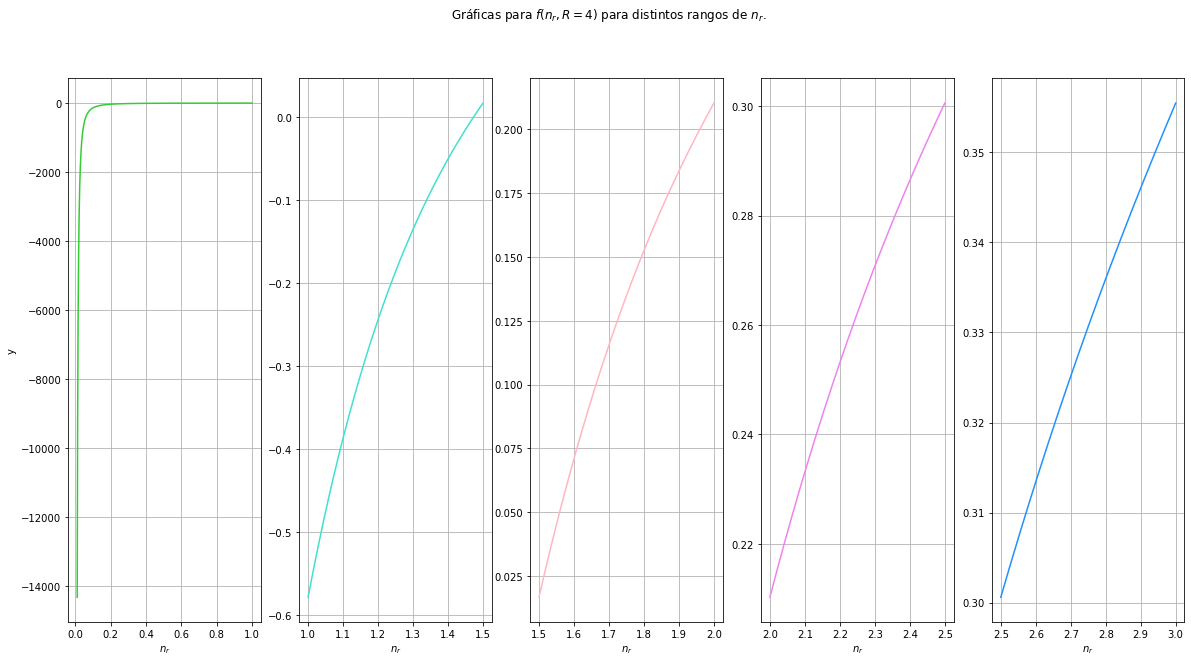

In [23]:
fig, ax = plt.subplots(1,5,figsize=(20,10))
ax[0].plot(n_r1, f(n_r1), c='limegreen')
ax[0].grid(1)
ax[0].set_ylabel('y')
ax[0].set_xlabel(r'$n_r$')
ax[1].plot(n_r2, f(n_r2), c='turquoise')
ax[1].grid(1)
ax[1].set_xlabel(r'$n_r$')
ax[2].plot(n_r3, f(n_r3), c='lightpink')
ax[2].grid(1)
ax[2].set_xlabel(r'$n_r$')
ax[3].plot(n_r4, f(n_r4), c='violet')
ax[3].grid(1)
ax[3].set_xlabel(r'$n_r$')
ax[4].plot(n_r5, f(n_r5), c='dodgerblue')
ax[4].grid(1)
ax[4].set_xlabel(r'$n_r$')
fig.suptitle(r'Gráficas para $f(n_r, R=4)$ para distintos rangos de $n_r$.')
plt.show()

De las anteriores gráficas, es posible notar que el intervalo más adecuado para estudiar la función es el de la gráfica en turquesa (i.e. el intervalo b del enunciado, con $n_r \in [1, 1.5]$), pues es en dicho intervalo donde la función cruza al eje x y donde se encuentra la raíz, que es lo que interesa en este caso.     

**c.** Primero, me traigo el método del punto fijo del archivo de python que desarrollé para los 6 primeros puntos:

In [24]:
''' Funcion que obtiene la raiz de una ecuacion no lineal de una variable usando el metodo del punto fijo.
params: 
f: funcion no lineal a la cual se busca encontrar su raiz.
g: funcion necesaria para realizar el metodo del punto fijo.
x1: punto inicial.
tol_x: tolerancia en x. 
tol_y: tolerancia en y. Por defecto, tol_x = tol_y = 10**-5.
n_max: numero maximo de iteraciones que le permito al algoritmo. Por defecto, n_max=1000.
retorna: 
num_iter: numero de iteraciones
x2: raiz final calculada
xr_iter: valor estimado de la raiz en cada iteracion'''
def punto_fijo(f, g, x1, tol_x=10**-5, tol_y=10**-5, n_max=1000):
    num_iter = 0 # Inicializo una variable con el numero de iteraciones
    xr_iter = np.array([]) #Defino un arreglo para ir guardando los valores de las raices candidatas, obtenidas en cada iteracion
    x2_prev = x1 # Creo una variable inicial para la raiz en la iteracion anterior
    while 1: # Inicio un proceso iterativo
        x2 = g(x1) # Se obtiene la raiz candidata
        xr_iter = np.append(xr_iter, x2) # Aniado la raiz al arreglo
        # Se evaluan los criterios de parada:
        if np.abs(x2-x2_prev)<=tol_x: # Si la resta de las raiz anterior con la actual es menor que la tolerancia, termino el proceso
            return num_iter, x2, xr_iter
        if np.abs(f(x2))<=tol_y: # Si la funcion evaluada en la raiz actual es tan cercana a cero como la tolerancia lo pide, termino el proceso.
            return num_iter, x2, xr_iter
        # Reviso si las iteraciones que llevo estan por debajo del limite establecido.
        if num_iter >= n_max:
            print('Maximo numero de iteraciones')
            return num_iter, x2, xr_iter
        # Se actualiza el intervalo de acuerdo con la condicion
        x1 = x2
        # Se actualiza x2 antiguo con el actual para la siguiente iteracion
        x2_prev = x2
        num_iter += 1 # Se agrega una iteracion al numero total de iteraciones



Ahora, defino las tres funciones $g(x)$ que me dan en el enunciado:
$$ g_1(n_r) = n_r = \left[\frac{1}{1.440}\left( 0.710 n_r^{-1} + 0.0636n_r + 0.088 \right) \right]^{-\frac{1}{2}}.$$

$$g_2(n_r) = n_r = \frac{1}{0.0636}\left(1.440 n_r^{-2} - 0.710 n_r^{-1} - 0.088\right).$$

$$g_3(n_r) = n_r = 1.440n_r^{-2} - 0.710n_r^{-1} - 0.088 - 0.0636n_r + n_r.$$

In [25]:
def g1(n_r):
    return ((1/1.440)*(0.710*(n_r**-1) + 0.0636*n_r + 0.088))**(-1/2)

def g2(n_r):
    return (1/0.0636)*(1.440*(n_r**-2) - 0.710*(n_r**(-1)) - 0.088)

def g3(n_r):
    return 1.440*(n_r**(-2)) - 0.710*(n_r**(-1)) - 0.088 - 0.0636*n_r + n_r

In [26]:
num_iter_pf_g1, x2_pf_g1, xr_iter_pf_g1 = punto_fijo(f, g1, x1=2)
num_iter_pf_g2, x2_pf_g2, xr_iter_pf_g2 = punto_fijo(f, g2, x1=2)
num_iter_pf_g3, x2_pf_g3, xr_iter_pf_g3 = punto_fijo(f, g3, x1=2)

Maximo numero de iteraciones


### Función $g_1(x)$:

Calculo el valor de $|n_{r_i} - n_{r_{i-1}}|$: 

In [27]:
resta_abs_g1 = [np.abs(xr_iter_pf_g1[i] - xr_iter_pf_g1[i-1]) for i in range(1,len(xr_iter_pf_g1)) ]

Veamos cuántas iteraciones alcanzó la función:

In [28]:
print(num_iter_pf_g1)

8


Ahora, construyo la tabla. Algunos valores están remplazados por guiones pues la función convergió antes. En este caso, convergió para 9 iteraciones.Para la función $g_1(n_r)$:

In [29]:
data_g1 =  {'Iter': [0, 1, 5, 10, 13],
            r'$n_r$': [xr_iter_pf_g1[0], xr_iter_pf_g1[1], xr_iter_pf_g1[5], '-', '-'], 
            r'$g_1(n_r)$': [g1(xr_iter_pf_g1[0]), g1(xr_iter_pf_g1[1]), g1(xr_iter_pf_g1[5]), '-', '-'],
            r'$|n_{r_i} - n_{r_{i-1}}|$': ['-', resta_abs_g1[0], resta_abs_g1[4], '-', '-']}

In [30]:
dg1 = pd.DataFrame(data_g1)
dg1

,Iter,$n_r$,$g_1(n_r)$,$|n_{r_i} - n_{r_{i-1}}|$
0,0,1.58916005292062,1.5048900456558678,-
1,1,1.5048900456558678,1.4821522576819921,0.0842700072647522
2,5,1.4732047252731744,1.4730432936688913,0.000552103456483
3,10,-,-,-
4,13,-,-,-


### Función $g_2(x)$:
Calculo el valor de $|n_{r_i} - n_{r_{i-1}}|$: 

In [31]:
resta_abs_g2 = [np.abs(xr_iter_pf_g2[i] - xr_iter_pf_g2[i-1]) for i in range(1,len(xr_iter_pf_g2)) ]

Veamos cuántas iteraciones alcanzó la función:

In [32]:
print(num_iter_pf_g2)

1000


Ahora, construyo la tabla. En este caso, todas las celdas están llenas porque la función nunca convergió. Para la función $g_2(n_r)$:

In [33]:
data_g2 =  {'Iter': [0, 1, 5, 10, 13],
            r'$n_r$': [xr_iter_pf_g2[0], xr_iter_pf_g2[1], xr_iter_pf_g2[5], xr_iter_pf_g2[10], xr_iter_pf_g2[13]], 
            r'$g_2(n_r)$': [g2(xr_iter_pf_g2[0]), g2(xr_iter_pf_g2[1]), g2(xr_iter_pf_g2[5]), g2(xr_iter_pf_g2[10]), g2(xr_iter_pf_g2[13])],
            r'$|n_{r_i} - n_{r_{i-1}}|$': ['-', resta_abs_g2[0], resta_abs_g2[4], resta_abs_g2[9], resta_abs_g2[12]]}

In [34]:
dg2 = pd.DataFrame(data_g2)
dg2

,Iter,$n_r$,$g_2(n_r)$,$|n_{r_i} - n_{r_{i-1}}|$
0,0,-1.3050314465408803,20.4648062584504871,-
1,1,20.4648062584504871,-1.8750845923212311,21.7698377049913674
2,5,8.2980832029732188,-2.4001475107771650,10.5089160896556031
3,10,-2.5439225861471790,6.5032892314570061,9.259675866354538
4,13,6.4104384630672868,-2.5741352971847835,8.9753307647710692


Es fácil notar que nunca se convergió a un valor en particular, sino que los resultados oscilan bastante.

### Función $g_3(x)$:
Calculo el valor de $|n_{r_i} - n_{r_{i-1}}|$: 

In [35]:
resta_abs_g3 = [np.abs(xr_iter_pf_g3[i] - xr_iter_pf_g3[i-1]) for i in range(1,len(xr_iter_pf_g3)) ]

Veamos cuántas iteraciones alcanzó la función:

In [36]:
print(num_iter_pf_g3)

11


Ahora, construyo la tabla. En este caso, hay algunos guiones porque la función convergió para 11 iteraciones. Para la función $g_3(n_r)$:

In [37]:
data_g3 =  {'Iter': [0, 1, 5, 10, 13],
            r'$n_r$': [xr_iter_pf_g3[0], xr_iter_pf_g3[1], xr_iter_pf_g3[5], xr_iter_pf_g3[10], '-'], 
            r'$g_3(n_r)$': [g3(xr_iter_pf_g3[0]), g3(xr_iter_pf_g3[1]), g3(xr_iter_pf_g3[5]), g3(xr_iter_pf_g3[10]), '-'],
            r'$|n_{r_i} - n_{r_{i-1}}|$': ['-', resta_abs_g3[0], resta_abs_g3[4], resta_abs_g3[9], '-']}

In [38]:
dg3 = pd.DataFrame(data_g3)
dg3

,Iter,$n_r$,$g_3(n_r)$,$|n_{r_i} - n_{r_{i-1}}|$
0,0,1.7898000000000001,1.6408009742307477,-
1,1,1.6408009742307477,1.5506035482542426,0.1489990257692524
2,5,1.4775399010620938,1.4746450634097985,0.0077391491015208
3,10,1.4730054928539198,1.4729870400578997,0.0000508973169331
4,13,-,-,-


## Punto 9

**a)** Para solucionar el sistema usando el método de Newton, se necesitan varias expresiones. Primero, tomo la ecuación 1 y la pongo en la forma $f(n_r) = 0.$ De esta forma, con $R=4$, se obtiene:

$$f(n_r,R) = -1.440n_r^{-2} + 0.710n_r^{-1} + 0.688 + 0.0636n_r - \frac{R-1}{R+1},$$
$$f(n_r) = -1.440n_r^{-2} + 0.710n_r^{-1} + 0.688 + 0.0636n_r - \frac{4-1}{4+1},$$
$$f(n_r) = -1.440n_r^{-2} + 0.710n_r^{-1} + 0.688 + 0.0636n_r - \frac{3}{5},$$
$$f(n_r) = -1.440n_r^{-2} + 0.710n_r^{-1} + 0.0636n_r + 0.088.  $$

Asimismo, se necesita la derivada de la función, $f'(n_r)$:
$$f'(n_r) = 2.880n_r^{-3} - 0.710n_r^{-2} + 0.0636.$$

Con estas expresiones, se obtiene una raíz candidata $n_{r_2}$ en la $i-$ésima iteración dada por:
$$n_{r_2}^i = n_{r_1} - \frac{f(n_{r_1})}{f'(n_{r_1})}.$$
En este caso, $n_{r_1} = 2.$ Entonces, para la primera iteración, 
$$n_{r_2}^i = 2 - \frac{-1.440(2)^{-2} + 0.710(2)^{-1} + 0.0636(2) + 0.088}{2.880(2)^{-3} - 0.710(2)^{-2} + 0.0636} = 1.1458756603. $$

Una vez calculada esta expresión, se evalúa si $|n_{r_2}^i - n_{r_2}^{i-1}| \leq \mathrm{Tol_x}$ o si $|f(n_{r_2}^i)| \leq \mathrm{Tol_y}$, donde Tol_x y Tol_y son las tolerancias en x, y de la función, respectivamente. Si se cumplen las desigualdades, el algoritmo deja de iterar. En caso contrario, se actualiza_
$n_{r_1} = n_{r_2}.$ Es decir, en este caso, el nuevo $n_{r_1} = 1.1458756603.$ Asimismo, se actualiza el valor de $n_{r_2}$ que se tenía actualizado de la iteración anterior con el nuevo. En este caso, como es la primera iteración, simplemente se cambia del valor original (que, en este caso, se inicializa en $n_{r_1}$ también.

**b).** Ahora, utilizo el método de Newton que previamente había definido. Primero defino la función en términos de numpy. Luego, la creo en términos de sympy y, finalmente, llamo al método.

In [39]:
def f(n_r):
    return -1.440/(n_r**2) + 0.710/n_r + 0.0636*n_r + 0.088

In [40]:
# 3. Newton
# 3.1. Defino la funcion f1 usando sympy
f_sympy = -1.440*(Symbol('x')**(-2)) + 0.710*(Symbol('x')**(-1)) + 0.0636*Symbol('x') + 0.088
f_sympy

0.0636*x + 0.088 + 0.71/x - 1.44/x**2

In [41]:
# 3.2. Llamo al metodo
num_iter_newton_f, x2_newton_f, xr_iter_newton_f = newton(f, f_sympy, x1=2, tol_x=10**(-10), tol_y=10**(-10))

Calculo el valor de $|n_{r_i} - n_{r_{i-1}}|$: 

In [42]:
resta_abs_newton = [np.abs(xr_iter_newton_f[i] - xr_iter_newton_f[i-1]) for i in range(1,len(xr_iter_newton_f)) ]

Veamos cuántas iteraciones alcanzó la función:

In [43]:
print(num_iter_newton_f)

6


Ahora, construyo la tabla. En este caso, la función convergió para 6 iteraciones entonces hay algunas celdas vacías. Incluyo datos hasta la cuarta iteración. Para la función $f(n_r)$:

In [44]:
data_newton =  {'Iter': [0, 1, 5, 10, 13],
            r'$n_r$': [xr_iter_newton_f[0], xr_iter_newton_f[1], xr_iter_newton_f[5], '-', '-'], 
            r'$f(n_r)$': [f(xr_iter_newton_f[0]), f(xr_iter_newton_f[1]), f(xr_iter_newton_f[5]), '-', '-'],
            r'$|n_{r_i} - n_{r_{i-1}}|$': ['-', resta_abs_newton[0], resta_abs_newton[4], '-', '-']}

In [45]:
dn = pd.DataFrame(data_newton)
dn

,Iter,$n_r$,$f(n_r)$,$|n_{r_i} - n_{r_{i-1}}|$
0,0,1.1458756603006908,-0.3162079727098708,-
1,1,1.3659177273747134,-0.0771459318514418,0.2200420670740226
2,5,1.4729765475659129,-0.0000000000000007,0.0000000284826094
3,10,-,-,-
4,13,-,-,-


Es posible ver que el método de Newton es una excelente alternativa pues, incluso exigiendo mejores tolerancias (en este caso, del orden de $10^{-10}$), el método converge en 6 iteraciones. Por otro lado, usando el método del punto fijo, y con una tolerancia menor (del orden de $10^{-5}$), el método no converge en algunas ocasiones; y, en otras, tarda lo mismo o más que el de Newton. 

**c.** Ahora, es de interés encontrar la tasa de convergencia para el método de Newton. Primero, uso la función que definí en el archivo de <code>python</code>:

In [46]:
'''Metodo que calcula la tasa de convergencia para un metodo de encontrar raices en particular a partir de un arreglo con los 
valores calculados en las iteraciones. Se usa el metodo visto en clase.
params:
x_r: El arreglo con las raices calculadas en las iteraciones.
f: Funcion a la cual se busca encontrar la raiz.
x1: Un punto inicial para encontrar la raiz, usando el metodo de scipy. 
retorna:
r_array: Un arreglo con las tasas de convergencia calculdas.'''
def tasa_convergencia(x_r, f, x1):
    # Estimamos el valor "verdadero" de la raíz a través de la función fsolve de scipy.
    xroot_true = opt.fsolve(f, x1)
    # Encuentro la estimacion del error para cada iteracion
    eps_array = np.abs(x_r - xroot_true)
    # Encuentro una estimacion de la tasa de convergencia para cada iteracion
    r_array = []
    r_array = ((np.log10(eps_array[1: np.size(eps_array)-1] / 
                     eps_array[2:np.size(eps_array)])) /
           (np.log10(eps_array[0: np.size(eps_array)-2] /
                     eps_array[1:np.size(eps_array)-1])))
    return r_array

Llamo al método:

In [47]:
r_array_newton = tasa_convergencia(xr_iter_newton_f, f, x1=2)

Grafico:

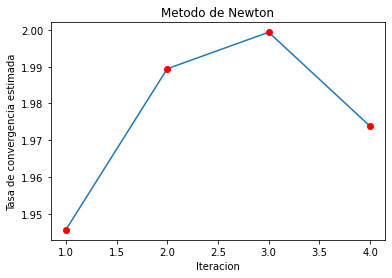

In [48]:
# Grafico el valor de la tasa de convergencia para cada iteracion
iter_array = np.arange(1.0, np.size(r_array_newton)+1)
plt.figure()
plt.plot(iter_array, r_array_newton)
plt.plot(iter_array, r_array_newton, 'or')
plt.xlabel('Iteracion')
plt.ylabel('Tasa de convergencia estimada')
plt.title('Metodo de Newton')
plt.show()

Dadas el valor de la tasa de convergencia estimada, es posible notar que, como se vio en la clase, esta se encuentra **alrededor de 2 para el método de Newton**.